In [1]:
import logging
import backtrader as bt
from datetime import datetime

from Commissions import CommInfo_Futures_Perc_Mult
from Parser import parse_args
from Datasets import *
from Strategies import StochMACD
from utils import print_sqn, print_trade_analysis

def runstrat(args=None):
    leverage = 5
    
    cerebro = bt.Cerebro(optreturn=False)
    cerebro.broker.set_shortcash(False)
    cerebro.broker.set_cash(1000)
    cerebro.broker.setcommission(commission=0.00015, leverage=leverage)

    dataname = DATASETS.get('btc_hourly')
    data = bt.feeds.GenericCSVData(
        dataname=dataname,
#         fromdate=datetime(2021,2,9),
#         todate=datetime(2021,4,1),
        fromdate=datetime(2021,1,1),
        todate=datetime(2021,6,1),
        timeframe=bt.TimeFrame.Minutes,
        nullvalue=0.0,
        datetime=0,
        open=4,
        high=5,
        low=6,
        close=7,
        volume=8,
        compression=60,
        headers=True,
    )

    cerebro.adddata(data)

    # cerebro.addsizer(bt.sizers.SizerFix, stake=args.stake)
    # cerebro.addsizer(bt.sizers.PercentSizer, percents=args.cashperc)

    # cerebro.addanalyzer(bt.analyzers.SharpeRatio, _name='sharpe_ratio', timeframe=bt.TimeFrame.Minutes, compression=60)
    # cerebro.addanalyzer(bt.analyzers.Returns, _name='returns', timeframe=bt.TimeFrame.Minutes, compression=60)
    cerebro.addanalyzer(bt.analyzers.VWR, _name='vwr', timeframe=bt.TimeFrame.Minutes, compression=60)
    
    cerebro.addobserver(bt.observers.Value)
    
    cerebro.addstrategy(StochMACD, 
        macd1=9,
        macd2=21,
        macdsig=8,
        atrdist=5,
        reversal_sensitivity=19,
        short_perc=100,
        leverage=leverage,
        loglevel=logging.DEBUG,
    )

    cerebro.addanalyzer(bt.analyzers.TradeAnalyzer, _name="ta")
    cerebro.addanalyzer(bt.analyzers.SQN, _name="sqn")

    initial_value = cerebro.broker.getvalue()
    print('Starting Portfolio Value: %.2f' % initial_value)
    result = cerebro.run()

    # Print analyzers - results
    final_value = cerebro.broker.getvalue()
    print('Final Portfolio Value: %.2f' % final_value)
    print('Profit %.3f%%' % ((final_value - initial_value) / initial_value * 100))
    print_trade_analysis(result[0].analyzers.ta.get_analysis())
    print_sqn(result[0].analyzers.sqn.get_analysis())
    
    return cerebro

cerebro = runstrat()


ENV =  development
Starting Portfolio Value: 1000.00


DEBUG:root:2021-01-07 07:00:00, SELL CREATE, 36859.85
DEBUG:root:2021-01-07 07:00:00, === sell cerebro cash 1000.0
DEBUG:root:2021-01-07 07:00:00, === sell size, 0.06782447568289074
INFO:root:2021-01-07 08:00:00, SELL EXECUTED: ENTRY SHORT Order, Amount: -0.07, Price: 36863.04000, Cost: 2500.21636, Comm 0.37503
DEBUG:root:2021-01-07 08:00:00, Close, 37217.55
DEBUG:root:2021-01-07 08:00:00, ATR: 776.64
DEBUG:root:2021-01-07 08:00:00, previous stoch RSI: 62.84
DEBUG:root:2021-01-07 08:00:00, current stoch RSI: 52.81
DEBUG:root:2021-01-07 08:00:00, fastk: 52.81
DEBUG:root:2021-01-07 08:00:00, fastd: 66.22
DEBUG:root:2021-01-07 08:00:00, 
INFO:root:2021-01-08 10:00:00, BUY EXECUTED: STOPLOSS for SHORT, Amount: 0.07, Price: 40637.8991, Cost: 2500.2164, Comm 0.41
DEBUG:root:2021-01-08 10:00:00, Close, 40721.45
DEBUG:root:2021-01-08 10:00:00, ATR: 1086.96
DEBUG:root:2021-01-08 10:00:00, previous stoch RSI: 47.24
DEBUG:root:2021-01-08 10:00:00, current stoch RSI: 58.47
DEBUG:root:2021-01-08 10

DEBUG:root:2021-03-18 08:00:00, ATR: 715.81
DEBUG:root:2021-03-18 08:00:00, previous stoch RSI: 56.92
DEBUG:root:2021-03-18 08:00:00, current stoch RSI: 27.60
DEBUG:root:2021-03-18 08:00:00, fastk: 27.60
DEBUG:root:2021-03-18 08:00:00, fastd: 56.67
DEBUG:root:2021-03-18 08:00:00, 
DEBUG:root:2021-03-31 06:00:00, REVERSAL BUY, 59687.56
DEBUG:root:2021-03-31 06:00:00, === buy cerebro cash 824.1264310362808
DEBUG:root:2021-03-31 06:00:00, === buy size, 0.034518349846948036
INFO:root:2021-03-31 07:00:00, Order Canceled: STOPLOSS for SHORT
DEBUG:root:2021-03-31 07:00:00, Close, 58173.83
DEBUG:root:2021-03-31 07:00:00, ATR: 574.86
DEBUG:root:2021-03-31 07:00:00, previous stoch RSI: 44.11
DEBUG:root:2021-03-31 07:00:00, current stoch RSI: 38.53
DEBUG:root:2021-03-31 07:00:00, fastk: 38.53
DEBUG:root:2021-03-31 07:00:00, fastd: 31.14
DEBUG:root:2021-03-31 07:00:00, 
INFO:root:2021-03-31 07:00:00, BUY EXECUTED: CLOSE, Amount: 0.07, Price: 59687.5600, Cost: 4123.7235, Comm 0.63
DEBUG:root:2021-0

Final Portfolio Value: 2840.97
Profit 184.097%
Trade Analysis Results:
               Total Open     Total Closed   Total Won      Total Lost     
               1              10             4              6              
               Strike Rate    Win Streak     Losing Streak  PnL Net        
               1              2              5              1646.28        
SQN: 1.1


DEBUG:matplotlib:CONFIGDIR=/Users/wilfredbtan/.matplotlib
DEBUG:matplotlib:matplotlib data path: /Users/wilfredbtan/Library/Python/3.8/lib/python/site-packages/matplotlib/mpl-data
DEBUG:matplotlib:loaded rc file /Users/wilfredbtan/Library/Python/3.8/lib/python/site-packages/matplotlib/mpl-data/matplotlibrc
DEBUG:matplotlib:matplotlib version 3.2.0
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is darwin
DEBUG:matplotlib:loaded modules: ['sys', 'builtins', '_frozen_importlib', '_imp', '_warnings', '_frozen_importlib_external', '_io', 'marshal', 'posix', '_thread', '_weakref', 'time', 'zipimport', '_codecs', 'codecs', 'encodings.aliases', 'encodings.cp437', 'encodings', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', '_abc', 'abc', 'io', '_stat', 'stat', '_collections_abc', 'genericpath', 'posixpath', 'os.path', 'os', '_sitebuiltins', '_locale', '_bootlocale', 'types', 'importlib._bootstrap', 'importlib._bootstrap_external', 'warnings', 'importlib', 'impor

DEBUG:matplotlib:CACHEDIR=/Users/wilfredbtan/.matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from /Users/wilfredbtan/.matplotlib/fontlist-v310.json
DEBUG:matplotlib.pyplot:Loaded backend MacOSX version unknown.
DEBUG:matplotlib.pyplot:Loaded backend MacOSX version unknown.
DEBUG:matplotlib.pyplot:Loaded backend nbAgg version unknown.


<IPython.core.display.Javascript object>


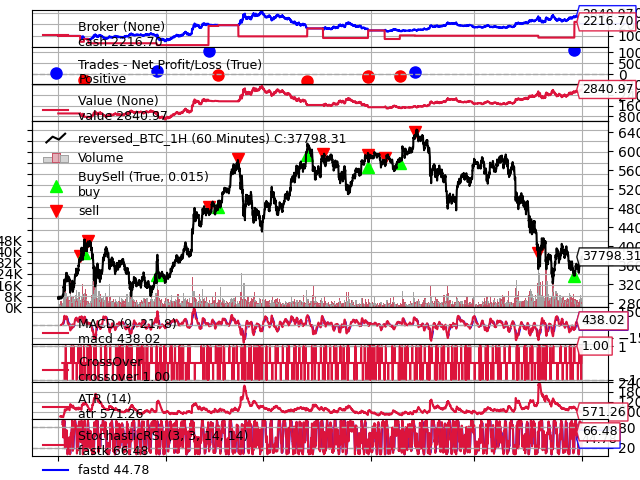

[[<Figure size 640x480 with 9 Axes>]]

In [2]:
cerebro.plot()